In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocessor import LOBPreprocessor
from utils.ab_tester import ABTester
from utils.var_model import VanillaVAR

## Data preprocessing

In [2]:
prep = LOBPreprocessor()
prep.add_vwap()
lob_data = prep.lob_data

INFO:root:Preprocessor initialized!
INFO:root:VWAP added!


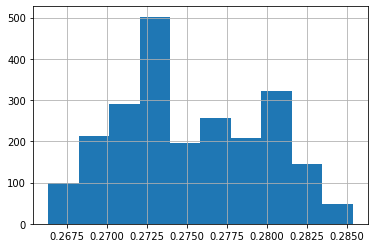

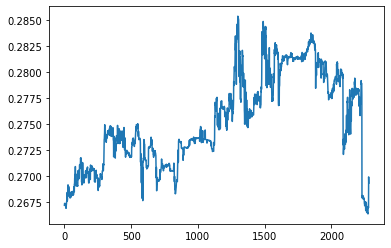

In [3]:
prep.vwap.hist()
plt.show()
prep.vwap.plot()
plt.show()

In [4]:
prep.diff_time_series()
data_train, data_test = LOBPreprocessor.train_test_split(prep.price_only(), train_frac=0.9)
preprocessed_data_train, scaler_train = LOBPreprocessor.normalize(data_train)
preprocessed_data_test, _ = LOBPreprocessor.normalize(data_train, scaler_train)

INFO:root:Data differentiated
INFO:root:Starting normalize data
INFO:root:Data is normalized
INFO:root:Starting normalize data
INFO:root:Data is normalized


## AB tests

In [ ]:
ab_tester = ABTester(preprocessed_data_train, prep.columns)
#ab_tester.test_kpss()
#ab_tester.test_adf()

## Modeling

### Vanilla VAR

In [5]:
model = VanillaVAR(preprocessed_data_train, preprocessed_data_test)
model.train()


INFO:root:Vanilla VAR initialized
INFO:root:Start fitting
INFO:root:Selecting lag order
INFO:root:Order selected
INFO:root:Fitted succesfully


In [6]:
# for col_id in range(len(prep.columns)):
#     print(prep.columns[col_id])
#     model.validate(col_id=col_id)
#     print('\n\n\n\n\n')


In [7]:
# for col_id in range(len(prep.columns)):
#     print(prep.columns[col_id])
#     model.validate_inverse_transform(col_id, scaler_train)
#     print('\n\n\n\n\n')

In [8]:
for col_id in range(len(prep.columns)):
    model.validate_classify(col_id, scaler_train)

INFO:root:p=15
INFO:root:Compare signs: 0.48148148148148145
INFO:root:p=15
INFO:root:Compare signs: 0.24951267056530213
INFO:root:p=15
INFO:root:Compare signs: 0.253411306042885
INFO:root:p=15
INFO:root:Compare signs: 0.25292397660818716
INFO:root:p=15
INFO:root:Compare signs: 0.2631578947368421
INFO:root:p=15
INFO:root:Compare signs: 0.2729044834307992
INFO:root:p=15
INFO:root:Compare signs: 0.2675438596491228
INFO:root:p=15
INFO:root:Compare signs: 0.6023391812865497
INFO:root:p=15
INFO:root:Compare signs: 0.2787524366471735
INFO:root:p=15
INFO:root:Compare signs: 0.29580896686159847
INFO:root:p=15
INFO:root:Compare signs: 0.31189083820662766
INFO:root:p=15
INFO:root:Compare signs: 0.26949317738791423
INFO:root:p=15
INFO:root:Compare signs: 0.5877192982456141
INFO:root:p=15
INFO:root:Compare signs: 0.2850877192982456
INFO:root:p=15
INFO:root:Compare signs: 0.5799220272904484
INFO:root:p=15
INFO:root:Compare signs: 0.29239766081871343
INFO:root:p=15
INFO:root:Compare signs: 0.26559454

IndexError: index 20 is out of bounds for axis 0 with size 20

### Sparse VAR